In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn-dark-palette','dark_background'])
import warnings
warnings.filterwarnings(action = 'ignore')

# IMPORTING DATASETS

In [2]:
data=pd.read_csv('churn_prediction_simple.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [3]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [4]:
data['churn'].value_counts()/len(data)

0    0.806317
1    0.193683
Name: churn, dtype: float64

In [6]:
#seperating dependent and independent variables
X=data.drop(columns=['churn','customer_id'])
Y=data['churn']

In [8]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

In [11]:
#splitting thev dataset
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(scaled_X,Y,train_size=0.80)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

# MODEL BUILDING,PREDICTIONS AND ODD RATIOS

In [14]:
from sklearn.linear_model import LogisticRegression as LR
classifier=LR(class_weight='balanced')

In [16]:
classifier.fit(x_train,y_train)
predicted_values=classifier.predict(x_test)
predicted_probabilities=classifier.predict_proba(x_test)

In [17]:
predicted_values

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [18]:
predicted_probabilities,predicted_probabilities.shape

(array([[0.55739066, 0.44260934],
        [0.04850142, 0.95149858],
        [0.53377919, 0.46622081],
        ...,
        [0.39533844, 0.60466156],
        [0.4305965 , 0.5694035 ],
        [0.53136805, 0.46863195]]),
 (4414, 2))

In [19]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,predicted_values)
cf

array([[2667,  848],
       [ 340,  559]], dtype=int64)

In [21]:
#Accuracy
classifier.score(x_test,y_test)

0.7308563661078387

In [22]:
#calculating the precision score
from sklearn.metrics import precision_score
Precision=precision_score(y_test,predicted_values)
Precision

0.39729921819474057

In [23]:
#calculating reacll score
from sklearn.metrics import recall_score
Recall=recall_score(y_test,predicted_values)
Recall

0.6218020022246941

In [24]:
#manually calculating the fit score
f1=2/((1/Precision)+(1/Recall))
f1

0.4848222029488291

In [25]:
#calculating the f1_score
from sklearn.metrics import f1_score
F1=f1_score(y_test,predicted_values)
F1

0.48482220294882905

In [26]:
#calculating precision,recall,f1_score and support at once
from sklearn.metrics import precision_recall_fscore_support as PRF
Precision,recall,f1,support=PRF(y_test,predicted_values)

In [27]:
Precision

array([0.8869305 , 0.39729922])

In [28]:
recall

array([0.75874822, 0.621802  ])

In [29]:
f1

array([0.81784729, 0.4848222 ])

In [34]:
from sklearn.metrics import classifiaction_report
k= classification_report(y_test,predicted_values)
print(k)

ImportError: cannot import name 'classifiaction_report' from 'sklearn.metrics' (C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

# PRECISION_RECALL CURVE:

In [42]:
#gathering Precision/recall scores for different thresholds
from sklearn.metrics import precision_recall_curve
precision_points,recall_points,threshold_points=precision_recall_curve(y_test,predicted_probabilities[:,1])
precision_points.shape,recall_points.shape,threshold_points.shape

((4410,), (4410,), (4409,))

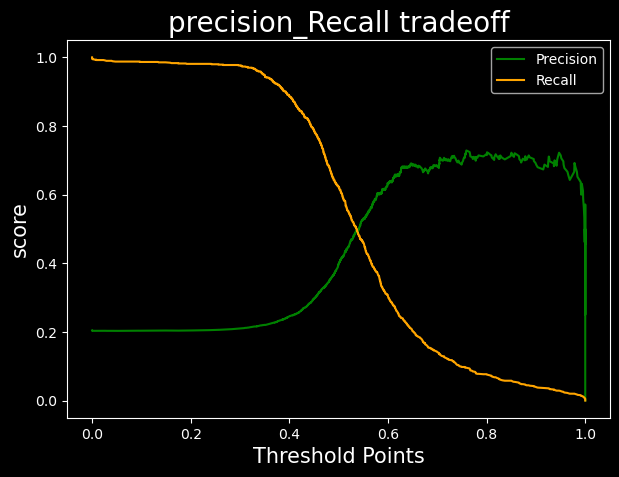

In [43]:
plt.figure(figsize=(7,5),dpi=100)
plt.plot(threshold_points,precision_points[:-1],color='green',label='Precision')
plt.plot(threshold_points,recall_points[:-1],color='orange',label='Recall')
plt.xlabel('Threshold Points',fontsize=15)
plt.ylabel('score',fontsize=15)
plt.title('precision_Recall tradeoff',fontsize=20)
plt.legend()

# AUC-ROC 

In [45]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold=roc_curve(y_test,predicted_probabilities[:,1])

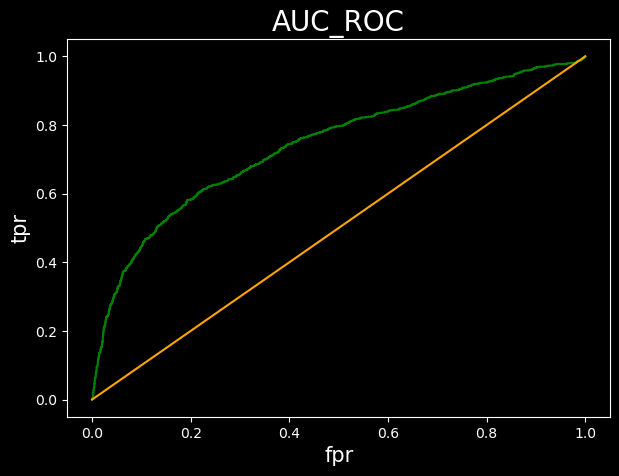

0.7418288377951161

In [46]:
plt.figure(figsize=(7,5),dpi=100)
plt.plot(fpr,tpr,color='green')
plt.plot([0,1],[0,1],color='orange',label='baseline')
plt.xlabel('fpr',fontsize=15)
plt.ylabel('tpr',fontsize=15)
plt.title('AUC_ROC',fontsize=20)
plt.show()
roc_auc_score(y_test,predicted_probabilities[:,1])

# COEFFICIENT PLOT

In [50]:
#arranging the data
c=classifier.coef_.reshape(-1)
x=X.columns
coeff_plot=pd.DataFrame({'coefficients':c,
                        'variable':x
                        })
#sorting the values
coeff_plot=coeff_plot.sort_values(by='coefficients')
coeff_plot.head()

,coefficients,variable
9,-2.541883,current_balance
13,-0.576258,current_month_credit
10,-0.200359,previous_month_end_balance
0,-0.153050,vintage
8,-0.139304,days_since_last_transaction


Text(0.5, 1.0, 'coefficients plot')

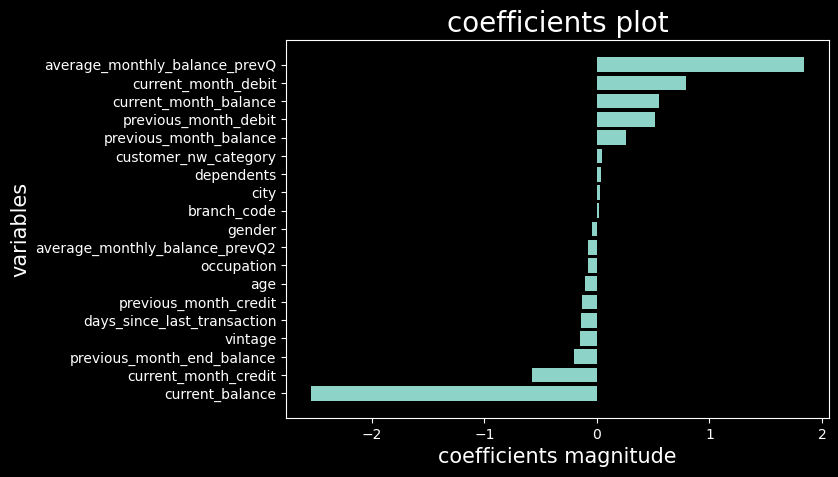

In [52]:
plt.figure(figsize=(7,5),dpi=100)
plt.barh(coeff_plot['variable'],coeff_plot['coefficients'])
plt.xlabel('coefficients magnitude',fontsize=15)
plt.ylabel('variables',fontsize=15)
plt.title('coefficients plot',fontsize=20)
